In [2]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Init Plugin
Init Graph Optimizer
Init Kernel


### The shape of input images should be 4D including Batch

In [3]:
(train_images, train_labels), (test_images, test_labels) = \
    fashion_mnist.load_data()

print('before reshape: ', train_images.shape, test_images.shape)

before reshape:  (60000, 28, 28) (10000, 28, 28)


In [4]:
train_images = np.reshape(train_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))

print('after reshape: ', train_images.shape, test_images.shape)

after reshape:  (60000, 28, 28, 1) (10000, 28, 28, 1)


### Fashion MNIST Data Preprocessing

In [9]:
def get_preprocessed_data(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

In [10]:
def get_preprocessed_ohe(images, labels):
    
    images, labels = get_preprocessed_data(images, labels)
    
    oh_labels = to_categorical(labels)
    
    return images, oh_labels

In [11]:
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

In [12]:
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print('train shape: ', tr_images.shape, tr_oh_labels.shape)
print('validation shape: ', val_images.shape, val_oh_labels.shape)
print('test shape: ', test_images.shape, test_oh_labels.shape)

train shape:  (51000, 28, 28, 1) (51000, 10)
validation shape:  (9000, 28, 28, 1) (9000, 10)
test shape:  (10000, 28, 28, 1) (10000, 10)


### CNN Model

In [13]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, MaxPooling2D
from tensorflow.keras.models import Model

# Convolution layer for feature map
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# Fully Connected layer for classification
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   

2021-08-14 16:57:54.190517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-14 16:57:54.190987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1081700   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 1,101,526
Trainable params: 1,101,526
Non-trainable params: 0
_________________________________________________________________

### Compile & fit

In [14]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    x=tr_images,
    y=tr_oh_labels,
    batch_size=128,
    epochs=30,
    validation_data=(val_images, val_oh_labels)
)

2021-08-14 17:08:31.234584: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-14 17:08:31.241419: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2021-08-14 17:08:31.446404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - ETA: 0s - loss: 0.4450 - accuracy: 0.8420

2021-08-14 17:08:40.929901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 10s 24ms/step - loss: 0.4450 - accuracy: 0.8420 - val_loss: 0.3162 - val_accuracy: 0.8859
Epoch 2/30
399/399 [==============================] - 9s 23ms/step - loss: 0.2779 - accuracy: 0.9000 - val_loss: 0.2764 - val_accuracy: 0.9010
Epoch 3/30
399/399 [==============================] - 9s 22ms/step - loss: 0.2282 - accuracy: 0.9172 - val_loss: 0.2431 - val_accuracy: 0.9123
Epoch 4/30
399/399 [==============================] - 9s 23ms/step - loss: 0.1891 - accuracy: 0.9305 - val_loss: 0.2194 - val_accuracy: 0.9219
Epoch 5/30
399/399 [==============================] - 9s 23ms/step - loss: 0.1589 - accuracy: 0.9413 - val_loss: 0.2226 - val_accuracy: 0.9229
Epoch 6/30
399/399 [==============================] - 9s 23ms/step - loss: 0.1331 - accuracy: 0.9507 - val_loss: 0.2502 - val_accuracy: 0.9140
Epoch 7/30
399/399 [==============================] - 9s 23ms/step - loss: 0.1071 - accuracy: 0.9603 - val_loss: 0.2349 - val_accuracy: 0.9200
Epoch 8/3

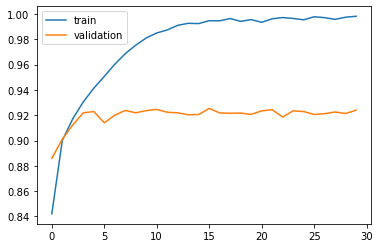

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='validation')
    plt.legend()

show_history(history)

### Evaluation

In [17]:
model.evaluate(test_images, test_oh_labels, batch_size=128, verbose=1)

79/79 [==============================] - 1s 10ms/step - loss: 0.5810 - accuracy: 0.9204


[0.5809656977653503, 0.9204000234603882]

### Dropout

In [18]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense, Flatten, Dropout

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout (Dropout)            (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1081

In [19]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30


2021-08-14 17:25:49.866450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - ETA: 0s - loss: 0.4640 - accuracy: 0.8375

2021-08-14 17:25:59.192370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 10s 24ms/step - loss: 0.4640 - accuracy: 0.8375 - val_loss: 0.3193 - val_accuracy: 0.8852
Epoch 2/30
399/399 [==============================] - 10s 24ms/step - loss: 0.3031 - accuracy: 0.8902 - val_loss: 0.2838 - val_accuracy: 0.8963
Epoch 3/30
399/399 [==============================] - 10s 24ms/step - loss: 0.2563 - accuracy: 0.9062 - val_loss: 0.2421 - val_accuracy: 0.9130
Epoch 4/30
399/399 [==============================] - 10s 24ms/step - loss: 0.2192 - accuracy: 0.9191 - val_loss: 0.2315 - val_accuracy: 0.9156
Epoch 5/30
399/399 [==============================] - 10s 26ms/step - loss: 0.1983 - accuracy: 0.9267 - val_loss: 0.2206 - val_accuracy: 0.9201
Epoch 6/30
399/399 [==============================] - 10s 25ms/step - loss: 0.1774 - accuracy: 0.9331 - val_loss: 0.2120 - val_accuracy: 0.9250
Epoch 7/30
399/399 [==============================] - 10s 24ms/step - loss: 0.1571 - accuracy: 0.9408 - val_loss: 0.2097 - val_accuracy: 0.9237
Epo

40/40 [==============================] - 1s 14ms/step - loss: 0.3745 - accuracy: 0.9265


[0.3745112121105194, 0.9265000224113464]

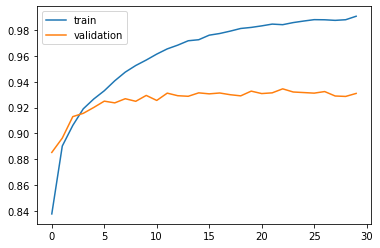

In [20]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

In [21]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

def create_model():
    input_tensor = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling2D(2)(x)

    x = Dropout(rate=0.5)(x)
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu')(x)
    X = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

model = create_model()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10816)             0   

In [22]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
  1/399 [..............................] - ETA: 2:01 - loss: 2.3179 - accuracy: 0.1094

2021-08-14 17:33:28.864505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


397/399 [============================>.] - ETA: 0s - loss: 0.4815 - accuracy: 0.8259

2021-08-14 17:33:39.431792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 11s 28ms/step - loss: 0.4811 - accuracy: 0.8260 - val_loss: 0.3422 - val_accuracy: 0.8763
Epoch 2/30
399/399 [==============================] - 11s 27ms/step - loss: 0.3336 - accuracy: 0.8787 - val_loss: 0.2821 - val_accuracy: 0.8971
Epoch 3/30
399/399 [==============================] - 11s 27ms/step - loss: 0.2879 - accuracy: 0.8933 - val_loss: 0.2561 - val_accuracy: 0.9073
Epoch 4/30
399/399 [==============================] - 11s 27ms/step - loss: 0.2587 - accuracy: 0.9037 - val_loss: 0.2355 - val_accuracy: 0.9140
Epoch 5/30
399/399 [==============================] - 11s 27ms/step - loss: 0.2354 - accuracy: 0.9118 - val_loss: 0.2374 - val_accuracy: 0.9099
Epoch 6/30
399/399 [==============================] - 11s 27ms/step - loss: 0.2165 - accuracy: 0.9193 - val_loss: 0.2169 - val_accuracy: 0.9211
Epoch 7/30
399/399 [==============================] - 11s 27ms/step - loss: 0.2006 - accuracy: 0.9245 - val_loss: 0.2109 - val_accuracy: 0.9220
Epo

40/40 [==============================] - 1s 15ms/step - loss: 0.2414 - accuracy: 0.9325


[0.24136759340763092, 0.9325000643730164]

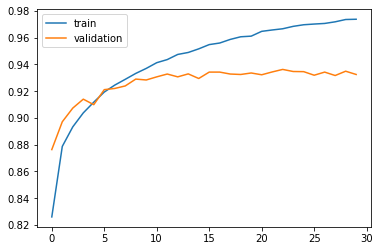

In [23]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)